In [1]:
import csv
import operator
import datetime
import os

from trainstop import *
from locations import *
from dateconversion import *

In [ ]:
#import data from all files
data_by_date = {}

for filename in os.listdir('./data'):
    date = datetime.date(int(filename[0:4]),int(filename[5:7]),int(filename[8:10]))
    file = open("data/" + date.isoformat() + "_IstDaten.csv")
    data_by_date[date] = csv.DictReader(file, delimiter=';')

#import data from files
train_stops = []
    
for date in data_by_date:
    for train in data_by_date[date]:
        train_stops.append(create_train_stop(train))


In [2]:
#import data from one file
file = open("data/2016-10-12_IstDaten.csv")
reader = csv.DictReader(file,delimiter=';')

train_stops = []
for train in reader:
    train_stops.append(TrainStop(train))

In [3]:
#count delay per stop

train_stops_delay = {}

for train_stop in train_stops:
    if train_stop not in train_stops_delay:
        train_stops_delay[train_stop.stop_name] = 0
    train_stops_delay[train_stop.stop_name] += train_stop.arrival_delay()
    
    

In [4]:
sorted_by_delay = sorted(train_stops_delay.items(), key=operator.itemgetter(1))

In [39]:
station_names = []
for station_name in train_stops_delay:
    station_names.append(station_name)

save_to_file(get_locations(station_names))

We are 0.00% complete. Currect station : Le Pont
We are 0.11% complete. Currect station : Köndringen
We are 0.23% complete. Currect station : Vicenza
We are 0.34% complete. Currect station : Frasne
We are 0.45% complete. Currect station : Böblingen
We are 0.56% complete. Currect station : Frinvillier-Taubenloch
We are 0.68% complete. Currect station : Lupfig
We are 0.79% complete. Currect station : Faoug
We are 0.90% complete. Currect station : Bad Zurzach
We are 1.01% complete. Currect station : Hitzkirch
We are 1.13% complete. Currect station : Seon
We are 1.24% complete. Currect station : Solothurn Allmend
We are 1.35% complete. Currect station : Biel/Bienne Bözingenfeld/Champs-de-Boujean
We are 1.47% complete. Currect station : Stettbach
We are 1.58% complete. Currect station : Olten Hammer
We are 1.69% complete. Currect station : Oberhausen Hbf
We are 1.80% complete. Currect station : Lausen
We are 1.92% complete. Currect station : Affoltern am Albis
We are 2.03% complete. Currect

In [ ]:
class Train:
    def __init__(self, first_stop, stops_with_locations):
        self.ID = stops[0].ID
        self.operator_ID = stops[0].operator_ID
        self.operator = stops[0].operator
        self.operator_name = stops[0].operator_name
        self.transport_type = stops[0].transport_type
        self.line_type = stops[0].line_type
        self.line_text = stops[0].line_text
        self.is_extra = stops[0].is_extra
        self.stops = stops_with_locations

In [7]:
trains = []
current_train = []

for stop in train_stops:
    if len(current_train) ==  0:
        current_train.append(stop)
    elif current_train[-1].ID == stop.ID:
        current_train.append(stop)
    else:
        trains.append(current_train)
        current_train = []

In [11]:
len(trains)

5654

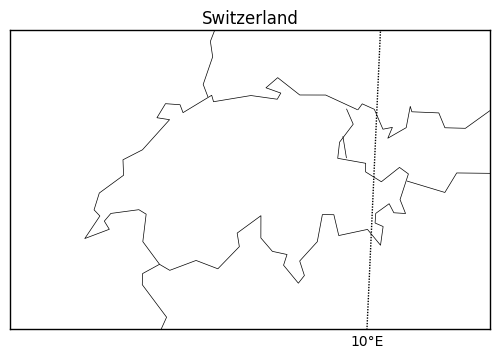

In [32]:
from mpl_toolkits.basemap import Basemap, shiftgrid, cm
import numpy as np
import matplotlib.pyplot as plt

# create the figure and axes instances.
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
# setup of basemap ('lcc' = lambert conformal conic).
# use major and minor sphere radii from WGS84 ellipsoid.
m = Basemap(llcrnrlon=5.0,llcrnrlat=45.2,urcrnrlon=11.566,urcrnrlat=48.352,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',area_thresh=1000.,projection='lcc',\
            lat_1=15.,lon_0=20.,ax=ax)
# transform to nx x ny regularly spaced 5km native projection grid
nx = int((m.xmax-m.xmin)/5000.)+1; ny = int((m.ymax-m.ymin)/5000.)+1

# draw coastlines and political boundaries.
m.drawcoastlines()
m.drawcountries()
m.drawstates()
# draw parallels and meridians.
# label on left and bottom of map.
parallels = np.arange(0.,80,20.)
m.drawparallels(parallels,labels=[1,0,0,1])
meridians = np.arange(10.,360.,30.)
m.drawmeridians(meridians,labels=[1,0,0,1])

ax.set_title('Switzerland')
plt.show()

In [2]:
import mpl_toolkits

In [1]:
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap

ImportError: No module named 'mpl_toolkits.basemap'